# Predicting Penguin Species
By: Annie Chen, Kevin Arreola, Shreyank Kadadi

## **Introduction**:

Penguins of different species vary in shape, size, beak length, etc. If researchers wanted to study how an ecological phenomena affected different species, being able to identify which penguin belongs to which species is going to be an important task. However, if there are too many penguins, taking all their measurement would be very time-consuming. Thus, it's important that ecologists or biologists are able to predict penguin species from a few measurements. Our goal for this project is to determine which features are most predictive of penguin species and build a machine learning model with optimal accuracy in predicting penguin species. 

## **Data Import + Cleaning**:


In this project, we used the Palmer's Penguin dataset, a dataset containing various quantitative/qualitative data about penguins. We will first import all necessary libraries and read in the dataset for this project. Then, we will use the info() function to initially scout potential features for future models. We will also look for features that would be useless for our model.

In [ ]:
import pandas as pd
import numpy as np
import urllib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [ ]:
#From this, we can see that both Region and Stage are not useful features
#since they each have one unique value
print(penguins['Region'].value_counts())
print(penguins['Stage'].value_counts())

Anvers    344
Name: Region, dtype: int64
Adult, 1 Egg Stage    344
Name: Stage, dtype: int64



We want to build models that predict the species of penguins based on a set of quantitative and qualitative features. To do that, we will split our Penguins dataset into 20% test data and 80% training data. We do this to hide some data from our models, so we have a fresh set of data to test the model on after training our models.


In [ ]:
#setting seed so we can replicate our findings
np.random.seed(1234)

#split data into test and train data 
train,test = train_test_split(penguins, test_size=0.2)

Next, we will be cleaning our train and test datasets using our clean_data function. The clean_data function takes in a dataframe, drops all irrelevant columns (characterstics irrelevant to predicting penguins species/with only one unique value), encode all qualitative features, and return the cleaned dataframe. 

We're going to go ahead and drop studyName, sample number, comments, and individual ID since these are not intrinsic characterstics of penguins. All penguins, regardless of species, share the same value for region and egg stage, so we know egg stage and region are not useful features. Machine learning models cannot process non-numerical data, so we're going to encode Island into numbers, where each number (0, 1, or 2) is going to be assigned to an Island name; Biscoe = 0, Dream = 1, and Torgersen = 2. 


In [ ]:
# shorten the species name
train["Species"] = train["Species"].str.split().str.get(0)
test["Species"] = test["Species"].str.split().str.get(0)

def clean_data(orig_df):
  """
  This function will take in a dataframe as input and drop the rows that have NA values,
  encode categorical variables, and remove rows with invalid entries. 
  """
  
  #making a copy of the dataframe
  df = orig_df.copy()

  #dropping irrelevant columns
  df = df.drop(["studyName", "Sample Number", "Comments",
                "Individual ID", "Stage", "Region", "Date Egg"], axis = 1)
  
  #getting rid of the rows where Sex is .
  df = df[df['Sex']!= '.']
  #dropping entries that have NA values and resetting index
  df = df.dropna().reset_index(drop=True)
    
  #pre-processing the data and encoding sex, species island columns
  le = preprocessing.LabelEncoder()
  df["Sex"] = le.fit_transform(df["Sex"]) 
  df["Island"] = le.fit_transform(df["Island"])
  df["Clutch Completion"] = le.fit_transform(df["Clutch Completion"])

  return df


 We will then further split the cleaned train and test datasets into X_train, y_train, X_test, and y_test where y contains our desired output (species) and X contains the rest of the features.

In [ ]:
#applying the clean_data function to the train and test dataframes
train = clean_data(train)
test = clean_data(test)

#further splitting the dataset to features (X) and output (y)
y_train = train['Species']
X_train = train.drop(['Species'], axis = 1)
y_test = test['Species']
X_test= test.drop(['Species'], axis = 1)

## **Exploratory Data Analysis:

Now that we have split and cleaned our dataset, it is now time to explore our dataset further in order to determine which features would be the most useful to use in our models. To do this, we will first create a summary table to find the mean of each of our six quantitative features grouped by the four qualitative features: species, sex, island, and clutch completion. The penguin_summary_table function accomplishes this by grouping our training dataset by the four qualitative variables and then using the numpy.mean() function on the grouped data.

In [ ]:
#summary table for quantitative variables grouped by species, sex, island, and clutch completion
def penguin_summary_table(group_cols,value_cols):
    """
    This function takes in group_cols, the quantitative columns we want to group by and value_cols
    the quantiative variables we want to display after grouping. Then, we call the 
    groupby function with the numpy.mean() function to find the mean value for each of the 
    value_cols grouped by group_cols. It returns the modified dataframe. 
    """

    #find mean value for each of the value_cols grouped by group_cols
    df_quant = train.groupby(group_cols).mean().round(2)[value_cols]
    return df_quant

penguin_summary_table(["Species", "Sex", "Island", "Clutch Completion"],
                      ["Culmen Length (mm)", "Culmen Depth (mm)", 
                       "Body Mass (g)", "Flipper Length (mm)", 
                       "Delta 15 N (o/oo)", 
                       "Delta 13 C (o/oo)"])

Culmen Length (mm)  Culmen Depth (mm)  \
Species   Sex Island Clutch Completion                                          
Adelie    0   0      0                               37.90              18.60   
                     1                               37.91              17.66   
              1      0                               37.30              17.90   
                     1                               36.61              17.54   
              2      0                               37.38              17.38   
                     1                               37.81              17.52   
          1   0      0                               40.50              18.90   
                     1                               40.28              18.94   
              1      0                               39.70              17.90   
                     1                               39.83              18.92   
              2      0                               40.87              19.47   
                     1                               40.57              19.39   
Chinstrap 0   1      0                               46.22              17.58   
                     1                               46.65              17.55   
          1   1      0                               50.87              19.17   
                     1                               51.14              19.11   
Gentoo    0   0      0                               44.53              13.77   
                     1                               45.72              14.29   
          1   0      0                               49.70              16.00   
                     1                               49.49              15.75   

                                        Body Mass (g)  Flipper Length (mm)  \
Species   Sex Island Clutch Completion                                       
Adelie    0   0      0                        3150.00               172.00   
                     1                        3400.00               186.29   
              1      0                        3350.00               183.00   
                     1                        3354.41               188.59   
              2      0                        3287.50               187.00   
                     1                        3406.25               189.06   
          1   0      0                        3950.00               180.00   
                     1                        3993.75               189.81   
              1      0                        4250.00               193.00   
                     1                        3959.21               190.32   
              2      0                        3816.67               197.67   
                     1                        4071.67               195.73   
Chinstrap 0   1      0                        3200.00               194.67   
                     1                        3578.95               191.32   
          1   1      0                        3987.50               197.33   
                     1                        3897.50               199.70   
Gentoo    0   0      0                        4591.67               212.67   
                     1                        4723.37               213.41   
          1   0      0                        5550.00               222.00   
                     1                        5490.76               221.13   

                                        Delta 15 N (o/oo)  Delta 13 C (o/oo)  
Species   Sex Island Clutch Completion                                        
Adelie    0   0      0                               8.38             -25.20  
                     1                               8.82             -25.91  
              1      0                               9.01             -25.56  
                     1                               8.92             -25.87  
              2      0                               8.92         

From this, we can see differences in the means of various quantitative variables from species to species. First, there is a noted difference in the culmen length between the Adelie and Chinstrap populations: wheras the Adelie penguins usually have a culmen length of around 37-40mm, Chinstrap penguins have higher culmen lengths of around 48-50mm. We can also notice that the culmen depth of Gentoo penguins (around 13-15mm) is lower than the culmen depth of Adelie and Chinstrap penguins (17-19mm). Similarly, the body mass of Gentoo penguins (around 5000g) is much higher than the body mass of the other two penguin species (around 3000-4000g). Additionally, the flipper length of Gentoo penguins (200mm - 225mm) also seems to be higher than the flipper length of the other two species (172-198mm). However, the other two quantitative features (Delta 15 N and Delta 13 C) do not have much difference between penguins species 

Next, we will move onto creating visualizations which can help us better choose our features. First, we will begin with a faceted histogram which will help us visualize the trends for each of the quantiative variables color coded by species.

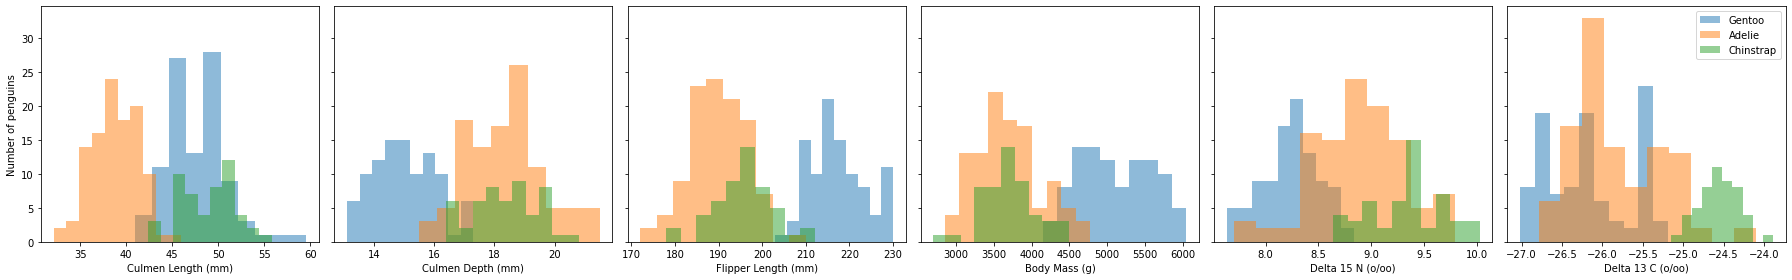

In [ ]:
#exploratory analysis - faceted histogram

fig, ax = plt.subplots(1, 6, figsize = (25, 4), sharey = True)
ax[0].set(ylabel = "Number of penguins")
features = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

#for each feature, iterate through each penguin species 
for col in range(len(features)): 
    #iterate through each unique specices
    for s in train["Species"].unique(): #only interating once for each feature???

      #extract rows with species == s and put in new sub-dataframe species_data
      species_data = train[train["Species"] == s] 

      #plot values of a specific feature for species s 
      ax[col].hist(species_data[features[col]], alpha = 0.5, label = s)

      #set xlabel = feature name
      ax[col].set(xlabel = features[col])          

#fit the subplots into the figure area
plt.tight_layout()
plt.legend()

The plots above show some potential features that can be considered to distinguish between certain species. For example, culmen length seems to be a good feature to distinguish Adelie penguins from Chinstrap/Gentoo penguins; On average, the distribution for Gentoo/Chinstrap penguins is shifted right of the distribution for Adelie penguins, which indicates Adelie penguins tend to have shorter culmens than Gentoo and Chinstrap penguins. Culmen depth seems to be good for distinguishing Gentoo penguins from Adelie/Chinstrap penguins; the distribution of Gentoo penguins' culmen depths is shifted left of Adelie and Chinstrap distributions of culmen depth.This indicates on average Gentoo penguins have shorter culmen depths than Adelie and Chinstrap penguins. 

Flipper length could distinguish Adelie/Chinstrap from Gentoo Penguins as Gentoo penguins have longer flippers on average than that of the other species. Body mass can also distinguish Adelie/Chinstrap from Gentoo penguins by the same logic. Because the same conclusion can be drawn from looking at the histograms of flipper length, body mass, and culmen depth, only one of these three features should be used as a feature.

Since the distributions of Delta 15 N levels and Delta 13 C levels have more overlap between different species, these two features may not be as ideal for predicting species compared to the other features mentioned earlier.

Now, we will create a scatterplot matrix to see how different quantitative variables correlate with each other. This can help us determine possible confounding variables and other factors that may overfit our models. As a general rule, we should probably exclude using variables that are too correlated with each other as unique features in our models.

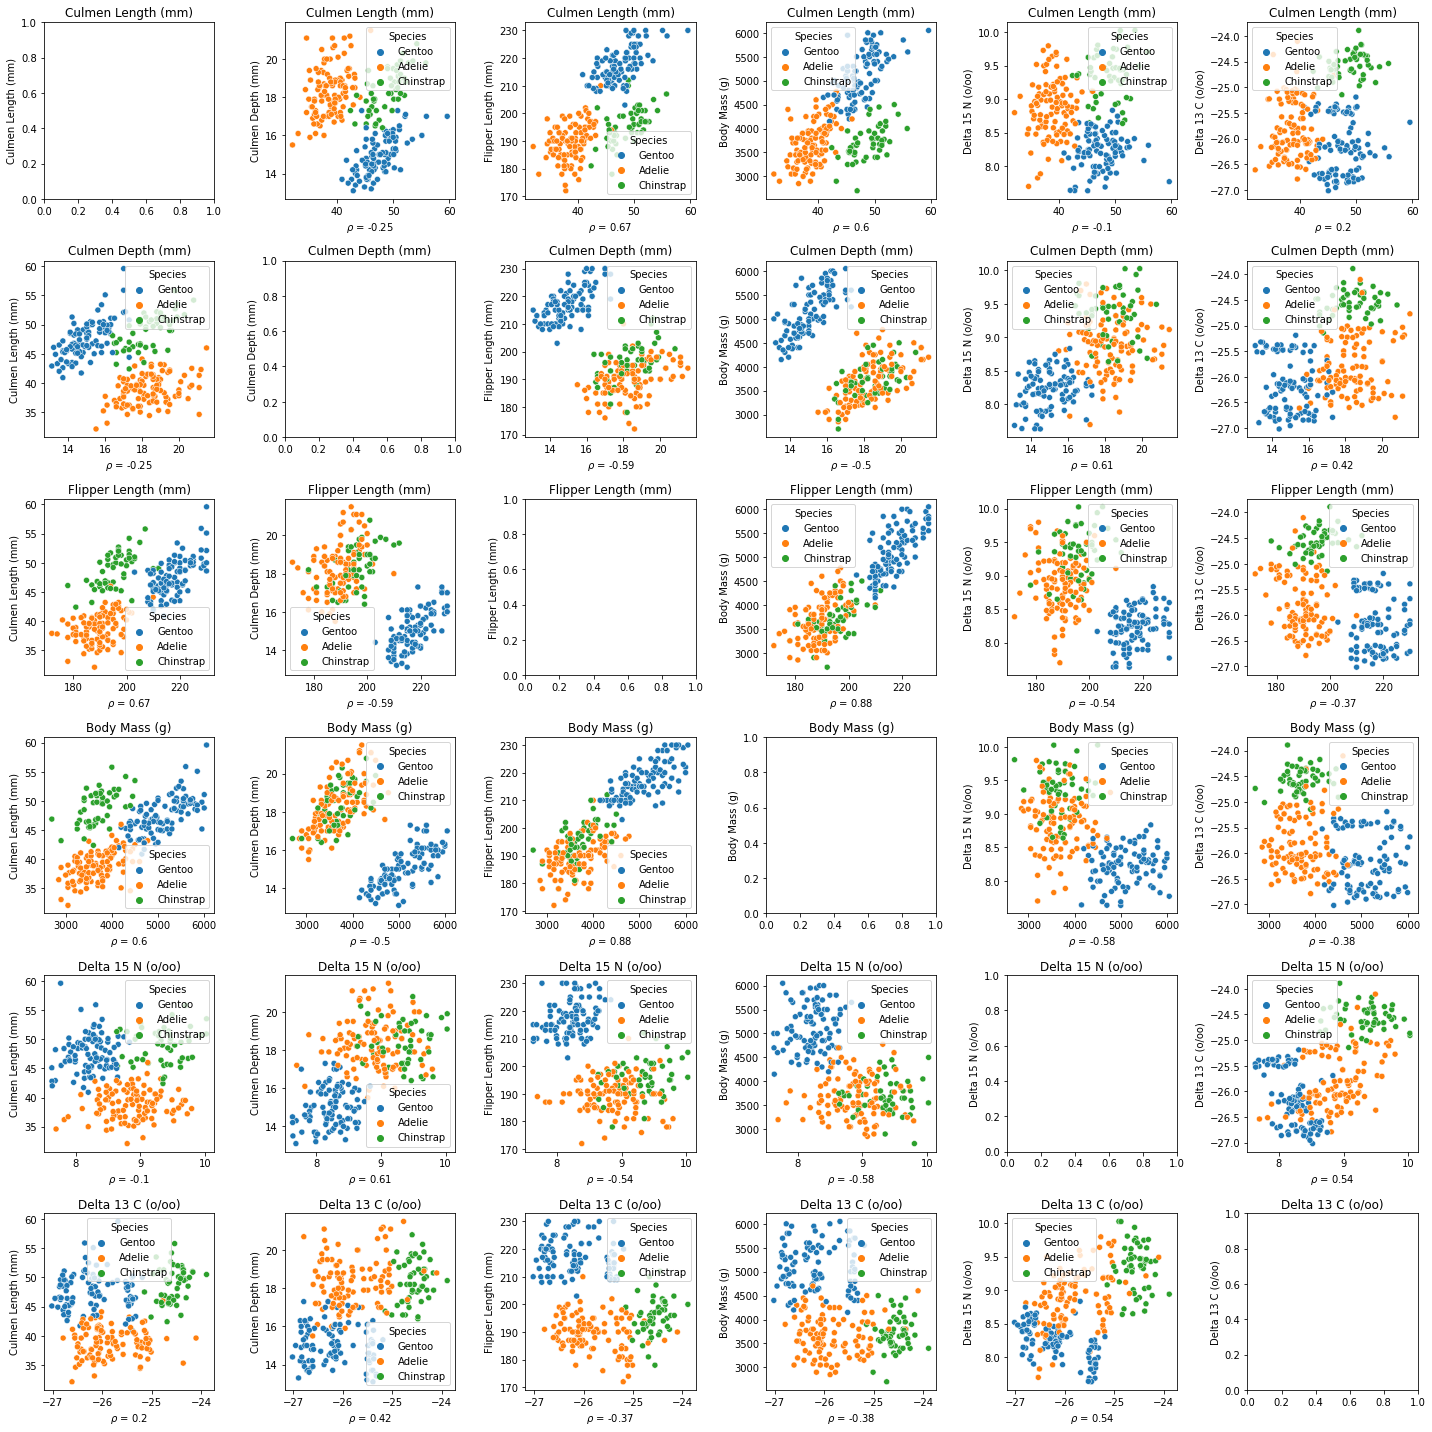

In [ ]:
#exploratory analysis - faceted histogram
def scatterplot_matrix(cols, figsize):
    
    """
    This function takes in cols (list) and figsize which represents column names of the penguins dataframe
    and size of desired plots respectively. Does not return anything, but makes a matrix of 
    scatterplots that compare all the columns with each other and calculate their correlation coefficients 
    (leaving the main diagonal empty).
    
    """
    
    #uses length of cols to make matrix of subplots
    fig,ax = plt.subplots(len(cols),len(cols),figsize=figsize)
    #for each pair of relations, create a scatterplot as long as we are not plotting a col against itself
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i!=j:
                fgrid=sns.scatterplot(x = train[cols[i]] , y = train[cols[j]], ax = ax[i][j], 
                                      hue = "Species", data=train)
                #calculate and label the correlation coefficients
                r = np.corrcoef(train[cols[i]],train[cols[j]]).round(2)[1][0]
                ax[i][j].set(xlabel = r"$\rho$ = " + str(r), title=cols[i], ylabel=cols[j])
            #if we encounter situation where index is equal to itself, simply just set title and ylabel
            else:
                ax[i][j].set(title=cols[i], ylabel=cols[j])
    plt.tight_layout()

#list of column names to be be plotted against each other
cols = ["Culmen Length (mm)", 
            "Culmen Depth (mm)", 
            "Flipper Length (mm)", 
            "Body Mass (g)", 
            "Delta 15 N (o/oo)", 
            "Delta 13 C (o/oo)"]

scatterplot_matrix(cols,figsize = (20,20))

From this scatterplot, we can find some important information about the correlation and clustering of different quantitative features with respect to species. Features with high correlation such as Body mass vs Flipper Length (with a correlation of .88) should definitely be avoided being put together in our models. On the other hand, features with lower correlation like culmen length vs. Delta 15 N (with a correlation of -0.1) should be considered. While the correlation is important, another factor we should consider in these plots are whether or not the points form clusters. In plots such as Body mass vs Flipper length, there seems to be a huge overlap between species boundaries -- this should generally be avoided. On the other hand, in plots like culmen length vs culmen depth, the points are clustered nicely by species with little to no overlap -- this should be favored.

Lastly, we will do a countplot in order to visualize the spread of penguin species across the other three qualitative variables. This will help us determine which of the qualitative features are good for our model. Again, we are looking for qualitative features that help us distinguish species.

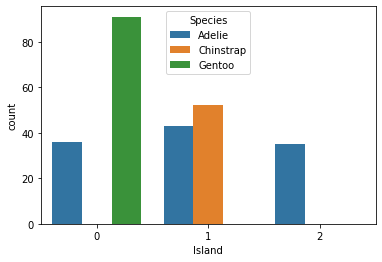

In [ ]:
sns.countplot(data=train, x="Island", hue = "Species")

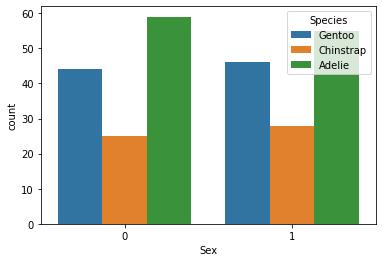

In [ ]:
sns.countplot(data=train, x="Sex", hue = "Species")

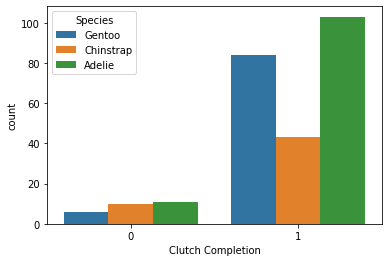

In [ ]:
sns.countplot(data=train, x="Clutch Completion", hue = "Species")

From our countplots, we can see that island is an extremely good feature to use since one of the islands (Island 2: Torgersen) contains only Adelie penguins and the other two islands (Island 0- Biscoe and 1-Dream) contain only two species each. Additionally, Gentoo penguins can only be found on Biscoe. Island is much better a variable like Sex which does not really help us distinguish between different species since there is a similar proportion of males and females for each species. 

We can also eliminate clutch completion as a potential feature since most penguins from all three species have a clutch completion of 1.

##3) **Feature Selection**

Next, we will use a correlation heatmap (with both qualitative and quantitative features). A correlation heat map will show us the correlation coefficients of each pair of features in our dataset and help us confirm which features we should use in our models. 

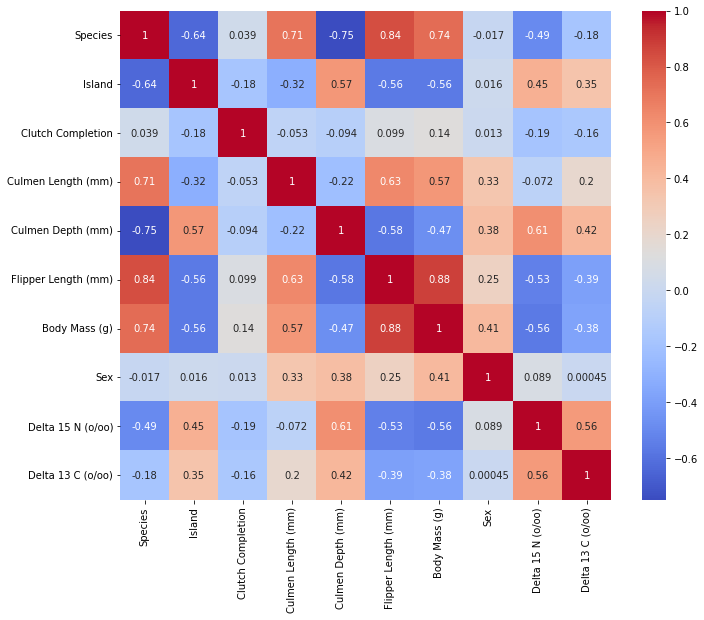

In [ ]:
#import the necessary library
import seaborn as sns
plt.figure(figsize = (11,9))

#encode species into 0, 1, 2 (Biscoe, Dream, Torgersen)
le = preprocessing.LabelEncoder()
train["Species"] = le.fit_transform(train["Species"])

#calculate the correlation coefficient between each pair of features
corr = train.corr()

#plot the correlation coefficients for each pair
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Correlation Heat Map Explanation**

From our correlation heat map, we see that Sex and Island’s correlation coefficient with species are 0.058 and -0.6 respectively, which confirms that *island* is the best qualitative feature to use.  

Among all the possible quantitative variables, the highest correlation coefficients between the quantitative variable and species are culmen length, culmen depth, flipper length, and body mass. 
At this point, if the absolute value of the correlation coefficient is very high (>= 0.7), we can "drop" one of the columns; the two features have similar patterns, so using both features to predict species would be redundant. This implies that after determining the top features to consider and choosing one feature to use in our model, we should inspect this feature’s correlation coefficients with the remaining features and pick the feature with the lowest correlation coefficient as our next quantitative feature.
Out of culmen depth, culmen length, flipper length, and body mass, the quantitative feature that is least correlated with island is culmen length with a correlation coefficient of -0.32, so *culmen length* is our first quantitative variable. Out of flipper length, body mass, and culmen depth (mm), the quantitative feature that is least correlated with culmen length is culmen depth with a correlation coefficient of -0.22, so *culmen depth* is our second quantitative variable. 


##4) **Modeling**

Now that we've determined what three features to use in our models, we're going to restrict our test and train data to the chosen features. Let's do this by encode the species column on our test data and reducing our X_train, y_train, X_test, and y_test datasets to the chosen features (Island, Culmen Length, and Culmen Depth).

In [ ]:

#encoding species for testing data 
le = preprocessing.LabelEncoder()
test["Species"] = le.fit_transform(test["Species"])
train["Species"] = le.fit_transform(train["Species"])

#set X-values for modeling to be culmen length, culmen depth, island
X_testML = test[["Culmen Length (mm)","Culmen Depth (mm)", "Island"]]

#set y-values to be encoded Species column on test data
y_testML = test["Species"]

#do the same for training data (data model will be fitted to/trained on)
X_trainML = train[["Culmen Length (mm)","Culmen Depth (mm)", "Island"]]
y_trainML = train["Species"]


Next, we will write the functions necessary to plot the confusion matrices and decision regions for each model.

In [ ]:
from sklearn.metrics import confusion_matrix

def conf_matrix(classif, X_test, y_test):
  """
  This function creates predictions of our model using the testing data and
  creates a confusion matrix, where we are able to see the differences
  between the model's predictions and the actual testing data

  Parameters:
  classif is the classifier we are using for our model
  X_test- subset of test dataframe with our 3 features
  y_test- panda series of numbers corresponding to species

  """

  y_test_pred = classif.predict(X_test) #For predictions of our model
  print("\nPredictions made by model with test data: \n"+ str(y_test_pred))

  #create confusion matrix
  #matrix where most of the non-zero entries are on the diagonal
  #look for the difference between y_test and y_test_pred
  #when the entries are on the diagonal, indicates correct predictions

  c=confusion_matrix(y_test,y_test_pred) 
  print("\nConfusion Matrix: \n" + str(c) + "\n")

  #The i,jth entry of our array is the number of times that the model predicted species j when the species 
  #was actually i. Based on the confusion matrix, this model is usually correct because there are large numbers
  #on the diagonal and there are 0's at most of the other entries. 

#dictionary to print corresponding island for each plot
island_dict = {0: "Biscoe", 1: "Dream", 2: "Torgersen"}

#features to plot
features = ["Culmen Length (mm)","Culmen Depth (mm)","Island"]

def plot_regions(df, model, features):
  '''
  This function takes in the grouped dataframe, a trained model, and a list of features.
  Then, our function creates a grid for each island, draws a contour map based on decision boundaries,
  and plots each species of penguin on their respective islands (no returns.)
  '''
  
  x0 = features[0] # x axis (should be Culmen Length in our case)
  x1 = features[1] # y axis (should be Culmen Depth in our case)
  y = df['Species'] # labels for species
  i = df['Island'].mode()[0] #island indices
  
  # create a matrix of data to predict off of
  grid_x=np.linspace(df[x0].min(),df[x0].max(),501) 
  grid_y=np.linspace(df[x1].min(),df[x1].max(),501) 
  xx,yy=np.meshgrid(grid_x,grid_y)

  #Use the ravel function to make arrays 1 dimension
  XX=xx.ravel()
  YY=yy.ravel()
  ZZ=np.ones(XX.shape) * i

  #Predict based on the model and then reshape to the right shape
  predict=model.predict(np.c_[XX,YY,ZZ])
  p = predict.reshape(xx.shape)
  
  # initialize figure and graph contour map
  fig,ax=plt.subplots(1)
  ax.contourf(xx,yy,p,cmap="jet",alpha=.2, norm=plt.Normalize(vmin=0,vmax=2))
  
  # plot data by the species (0 is Adelie, 1 is Chinstrap, 2 is Gentoo)
  ax.scatter(df[y==0][x0], df[y==0][x1], c = "blue", label = "Adelie" )
  ax.scatter(df[y==1][x0], df[y==1][x1], c = "green", label = "Chinstrap" )
  ax.scatter(df[y==2][x0], df[y==2][x1], c = "red", label = "Gentoo" )
  
  # label axes and graph based on the island and shows the legend
  ax.set(xlabel=str(x0),
          ylabel=str(x1),
          title=island_dict[i])
  ax.legend()

### Model 1 -- Random Forest Classifier

We will create our first model, a random forest model. A random forest model consists of a bunch of decision trees. Each individual tree makes a prediction and the class (in our case, penguin's species) with the most votes is the model's prediction.

Before creating our model, it's important we find the optimal max depth (the number of splits in each decision tree) for our random forest model. This will maximize performance on the test dataset. To do that, we iterate through possible depths from 1 to 20 and train a RandomForestClassifier model with the specified depth.  

The idea behind cross validation is we take a small portion of our training data, like 20% and use it as testing data. We train the model on the remaining 80%. Here, we've indicated there are 5 folds, and therefore 5 ways to split the training data/choose the test fold. cross_val_score() calculates the cross validation score for each split, and using the mean() we take the average of these scores. 

We repeat this process for each RandomForestClassifier model (with unique depth). The highest cross-validation score (telling us best performance of the model on unseen data) will point us to the best max_depth to use.

[Text(0, 0.5, 'Cross-validation score'),
 Text(0.5, 0, 'Depth'),
 Text(0.5, 1.0, 'Best Depth: 9')]

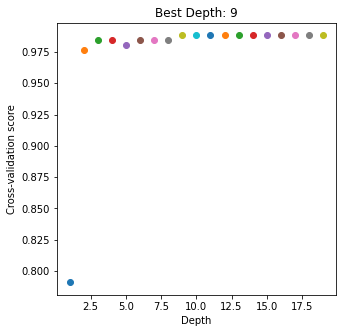

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
fig, ax = plt.subplots(1, figsize = (5,5))
best_cv, best_depth = 0,0

np.random.seed(1234)

#iterate through depths from 1-20
for depth in range(1,20):

  #create a model with specified depth
  RF = RandomForestClassifier(max_depth = depth, n_jobs = 1)

  #perform cross validation on specific model with 5 folds
  cv = cross_val_score(RF, X_trainML, y_trainML, cv = 5).mean()
  #graph the cross validation score against depth for each model
  ax.scatter(depth, cv)

  #find the best_depth corresponding to the highest cross-validation score
  if cv > best_cv:
    best_cv = cv
    best_depth = depth
ax.set(xlabel = "Depth", 
       ylabel = "Cross-validation score",
       title = "Best Depth: " + str(best_depth))

For each random forest model, we plot its average cross-validation score and depth. After a certain depth, like 2-3, the model's performance doesn't differ much across different depths.

Now that we have ascertained that the best depth is **9**, we can train and score our random forest model!

In [ ]:
RF = RandomForestClassifier(max_depth = best_depth)
RF.fit(X_trainML, y_trainML)
RF.score(X_testML, y_testML)

0.9545454545454546

Our random forest regression model has an accuracy of **95.45%!** This is pretty good! Over 95% of the unseen testing data was predicted correctly. 

In [ ]:
conf_matrix(RF,X_testML,y_testML)


Predictions made by model with test data: 
[0 2 0 0 0 2 2 1 0 0 0 0 0 2 2 1 1 2 0 1 2 0 0 0 1 1 2 1 1 0 1 2 2 0 0 2 0
 0 0 0 0 2 0 1 1 2 0 2 2 2 1 0 1 0 0 1 0 2 2 0 1 2 1 2 0 2]

Confusion Matrix: 
[[28  1  1]
 [ 1 15  0]
 [ 0  0 20]]



Our confusion matrix allows us to see our model’s predictions against the truth. From this confusion matrix, we can see that there are large numbers on the diagonal entries. These large numbers on the diagonal represent the correct predictions of our random forests model on the testing data. However, there are 3 cases in our testing data where the model is not correct. The 0,1th entry of the confusion matrix gives the number of times the model incorrectly predicts a penguin to be a Chinstrap penguin when the penguin is actually an Adelie penguin. In our case, our model only predicts one penguin to be a Chinstrap penguin when it is actually an Adelie penguin. The 1,0th entry of the confusion matrix gives the number of times the model incorrectly predicts a penguin to be an Adelie penguin when it is actually a Chinstrap penguin. In our case, our model only predicts one penguin to be an Adelie penguin when it is actually a Chinstrap penguin. The 2,0th entry of the confusion matrix gives the number of times the model incorrectly predicts a penguin to be an Adelie penguin when it is actually a Gentoo penguin. In our case, our model only predicts one penguin to be an Adelie penguin when it is actually a Gentoo penguin.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


""


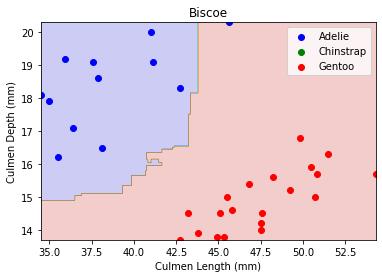

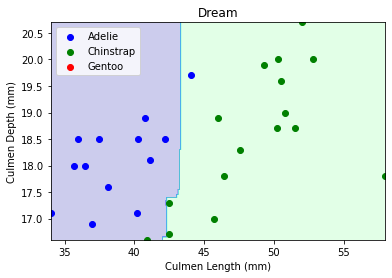

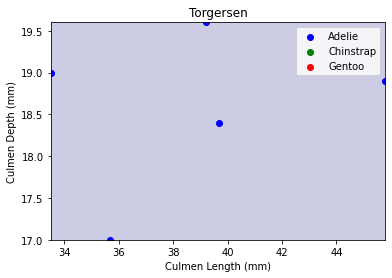

In [ ]:
#take entire testing data and divide into groups of data, grouped by Island
#For each sub-dataframe, pass the Random Forests model 
#and list of features to plot decision regions by island 
test.groupby(['Island']).apply(plot_regions,RF,features)


Here we've plotted test data on decision regions, with each plot corresponding to a different island. We get similar results to the confusion matrix: the model correctly predicts the species of the penguins most of the time. **Except for one penguin, it seems like the model predicted each penguin's (on Biscoe) species correctly. There is one Adelie penguin with a longer culmen and over 20 mm culmen depth that that was incorrectly classified as Gentoo. **

On Dream, there appears to be one Adelie penguin with an exceptionally longer culmen and higher culmen depth that was misclassified as a Chinstrap penguin. There is also a Chinstrap penguin with a much shorter culmen (around 40 mm) and smaller culmen depth (close to 16.5 mm) that was incorrectly classified as an Adelie. 

Finally it appears that all penguins (Adelie) on Torgersen were correctly classified. 

From our findings, it seems like the model tends to make incorrect predictions on penguins with exceptionally higher values for culmen length and culmen depth or lower values for culmen length and culmen depth (compared to the averages of their species), especially if the penguins were found on Biscoe and Dream. 

### Model 2 -- Support Vector Machines

Next, we will try a different model to model the data. Support Vector Machines are a supervised learning models that contain learning algorithms which are used for data classification. It uses a hyperplane(a decision boundary that helps classify data points) to attribute data points to their class(which in this case is the species of penguins). 


First, we will do cross-validation to find the optimal gamma for Support Vector machines. Gamma is a hyperparameter that conrols the degree of influence of a single point from the training data. High values indicate the points need to very close to be classified as the same group (e.g. species). 

Cross validation for support vector machines is a similar process to that of Random Forest. We will choose the gamma value that gives us the best average cross validation score on the original training data.

[Text(0, 0.5, 'Cross-validation score'),
 Text(0.5, 0, 'Gamma'),
 Text(0.5, 1.0, 'Best Gamma: 1.0')]

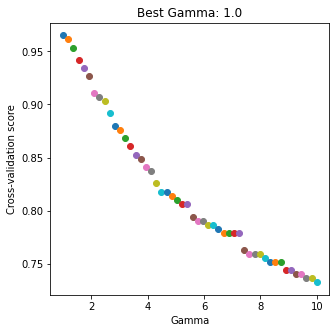

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#finding optimal value of gamma for SVM model
#logic of the process is similar to cross validation for Random Forest 
fig, ax = plt.subplots(1, figsize = (5,5))
best_cv, best_gamma = 0,0

#iterating through each possible value of gamma from 1-10
for g in np.linspace(1,10,50):  
  SVM = SVC(gamma = g)
  cv = cross_val_score(SVM, X_trainML, y_trainML, cv = 5).mean()
  ax.scatter(g, cv)
  if cv > best_cv:
    best_cv = cv
    best_gamma = g
ax.set(xlabel = "Gamma", 
       ylabel = "Cross-validation score",
       title = "Best Gamma: " + str(best_gamma))

From our plot of cross-validation score vs gamma, we see that in

Now that we have ascertained that the best gamma is 1, we can train and score our SVM model!

In [ ]:
#create SVM model using best gamma we found from cross validation
SVM = SVC(gamma = best_gamma) 

#train the model on training data (containing only selected features)
SVM.fit(X_trainML, y_trainML)

#score the model on test data 
SVM.score(X_testML, y_testML)

0.9545454545454546

Our SVM model has an accuracy of **95.45%**!

In [ ]:
conf_matrix(SVM,X_testML,y_testML)


Predictions made by model with test data: 
[0 2 0 0 0 2 2 1 0 0 0 0 0 2 2 0 1 0 0 1 2 0 0 0 1 1 2 0 1 0 1 2 2 1 0 2 0
 0 0 0 0 2 0 1 1 2 0 2 2 2 1 0 1 0 0 1 0 2 2 0 1 2 1 2 0 2]

Confusion Matrix: 
[[29  1  0]
 [ 2 14  0]
 [ 0  0 20]]



Our confusion matrix allows us to see our model’s predictions against the truth. From this confusion matrix, we can see that there are large numbers on the diagonal entries. These large numbers on the diagonal represent the correct predictions of our support vector machines model on the testing data. There are 3 cases in our testing data where the model is not correct. The 0,1th entry of the confusion matrix gives the number of times the model incorrectly predicts a penguin to be a Chinstrap penguin when the penguin is actually an Adelie penguin. In our case, our model predicts two penguins to be Chinstrap penguins when they are actually Adelie penguins. The 1,0th entry of the confusion matrix gives the number of times the model incorrectly predicts a penguin to be an Adelie penguin when it is actually a Chinstrap penguin. In our case, our model only predicts one penguin to be an Adelie penguin when it is actually a Chinstrap penguin.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


""


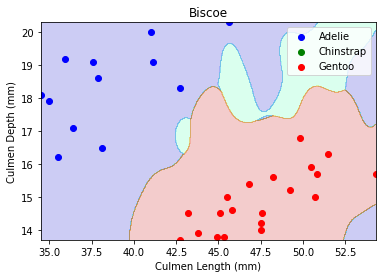

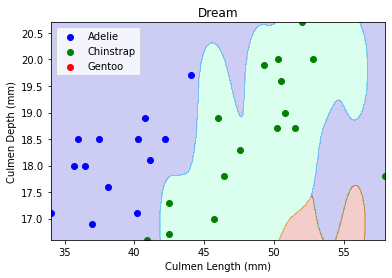

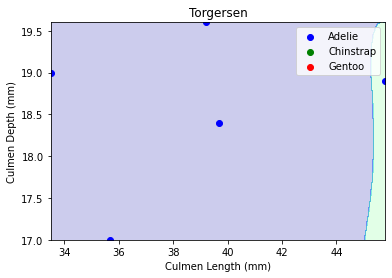

In [ ]:
#plot decision regions by island based on on SVM model
test.groupby(['Island']).apply(plot_regions,SVM, features )

In general, the model makes the correct predictions. On Dream, there is one Chinstrap penguin with an unusually long culmen that was incorrectly classified as an Adelie penguin. A chinstrap penguin with a shorter culmen length (around 40 mm) was misclassified as an Adelie.  On Torgersen, there is one Adelie penguin with an unusally long culmen that was classified a Chinstrap penguin. Compared with the Random Forests model, the model doesn't do quite as well Adelie penguins with longer culmen length and Chinstrap penguins with much shorter or higher culmen lengths than fellow penguins in the same species. However, with accuracy scores being the same, we can say both models are equally effective. 


### Model 3 -- Multinomial Logistic Regression

Our third and final model is multinomial logistic regression. Multinomial Logistic Regression is a supervised classification algorithm that utilizes multiple independent variables to predict the categorical placement in the dependent variable when there are more than two categories.

First, we will do cross-validation to find the optimal C for Multinomial Logistic Regression

[Text(0, 0.5, 'Cross-validation score'),
 Text(0.5, 0, 'C'),
 Text(0.5, 1.0, 'Best C: 2.5')]

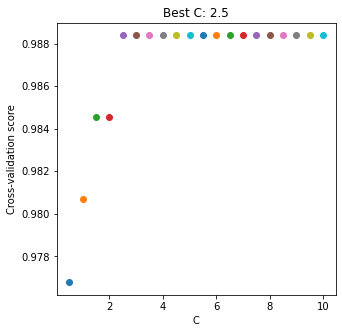

In [ ]:
from sklearn.linear_model import LogisticRegression

fig, ax = plt.subplots(1, figsize = (5,5))
best_cv, best_c = 0,0

#iterate through different c-values from 0.5 to 10
for c in np.linspace(0.5,10,20):
  #create a MLR model with specified c
  MLR = LogisticRegression(multi_class = "multinomial", max_iter = 2000, C = c)
  #find cross-validation score of the model, using 5 folds 
  cv = cross_val_score(MLR, X_trainML, y_trainML, cv = 5).mean()
  #graph the cross-validation against different C
  ax.scatter(c, cv)

  #find the best C value corresponding to the best cv score
  if cv > best_cv:
    best_cv = cv
    best_c = c
ax.set(xlabel = "C", 
       ylabel = "Cross-validation score",
       title = "Best C: " + str(best_c))

From our graph and cross-validation, we see that C = 2.5 results in the highest cross-validation score. Now that we have ascertained that the best C is 2.5, we can train and score our MLR model!

In [ ]:
#create logistic regression model using best value for C
MLR = LogisticRegression(multi_class = "multinomial", C = best_c, max_iter = 2000)

#fit the mode on training data
MLR.fit(X_trainML,y_trainML)

#score the model on test data 
MLR.score(X_testML,y_testML)

0.9393939393939394

Our MLR model has an accuracy of **93.94%**!


Predictions made by model with test data: 
[0 2 0 0 0 2 2 1 0 0 0 0 0 2 2 1 1 1 0 1 2 0 0 0 1 0 2 0 1 0 1 2 2 1 0 2 0
 0 0 0 0 2 0 1 1 2 0 2 2 2 1 0 1 0 0 1 0 2 2 0 1 2 1 2 0 2]

Confusion Matrix: 
[[28  2  0]
 [ 2 14  0]
 [ 0  0 20]]



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


""


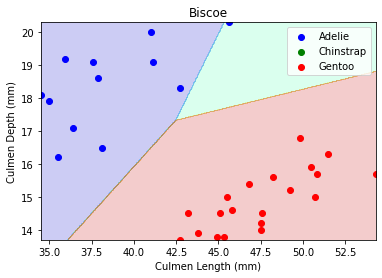

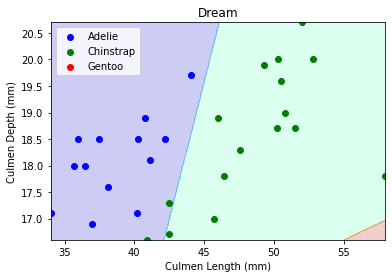

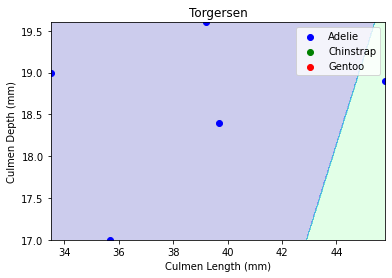

In [ ]:
#create confusion matrix for MLR model
conf_matrix(MLR,X_testML,y_testML)

#plot decision regions
test.groupby(['Island']).apply(plot_regions,MLR, features )

Our confusion matrix allows us to see our model’s predictions against the truth. From this confusion matrix, we can see that there are large numbers on the diagonal entries. These large numbers on the diagonal represent the correct predictions of our multinominal logistic regression model on the testing data. There are 4 cases in our testing data where the model is not correct. The 0,1th entry of the confusion matrix gives the number of times the model incorrectly predicts a penguin to be a Chinstrap penguin when the penguin is actually an Adelie penguin. In our case, our model predicts two penguins to be Chinstrap penguins when they are actually Adelie penguins. The 1,0th entry of the confusion matrix gives the number of times the model incorrectly predicts a penguin to be an Adelie penguin when it is actually a Chinstrap penguin. In our case, our model predicts two penguins to be Adelie penguins when they are actually Chinstrap penguins.




Right off the bat, we notice that decision boundaries for multinomial logistic regression model are a lot straighter. Similar to the other models, most of the test data was predicted correctly. As supported by the confusion matrix, two Chinstrap penguins were misclassified as Adelie penguins. These two penguins were on Dream island and have culmen lengths between 40-45 mm (on the lower end compared with other Chinstrap penguins. They also had unusually low culmen depth. On Biscoe, an Adelie penguin was misclassified as a chinstrap penguin probably because it had a longer culmen than average. On Torgersen, an Adelie penguin was misclassified as a Chinstrap penguin because of its unusually long culmen. 

This model failed to make the correct predictions for Adelie penguins with longer than average culmens. It also didn't work so well on Chinstrap penguins with shorter culmens than usual. 

Compared with Random Forests and support-vector machines, the multinomial logistic regression model has a slightly lower accuracy rate, which expect since the model made slightly more mistakes when predicting.




 ### Discussion

***Overall Performance of our models:***

Our **Random Forest Model** performed very well with a max depth of 9. It had an accuracy of 95.45%. This means that it was able to correctly predict the penguin species for 95.45% of the unseen data. The accuracy of our model can also be seen in our confusion matrix and and decision plot regions where there were few incorrect species predictions.

Our **Support Vector Machines model** also performed very well with a gamma value of 1. Similar to the Random Forest Model, it also had an accuracy of 95.45%. This means that it was also able to correctly predict the species of 95.45% of the unseen data. There were a few mistakes made by this model where species were incorrectly predicted, which we identified when observing the confusion matrix and the decision plot regions. 

Our **Multinomial Logistic Regression model** also performed very well with a C value of 2.5. It had an accuracy of 93.94%. However, in comparison to the previous two models, it performed slightly worse. For example, this model had four cases in which it incorrectly predicted the species of a penguin, while the random forest model and the support vector machines model both had 3 cases in which they incorrectly predicted the species of a penguin. 

The models with the best accuracy were the Random Forest model and the Support Vector Machines model because they both had an accuracy of 95.45%.

***Combination of model and features we recommend:***

Our findings in our analysis of the performance of our models suggests that the combinations that we recommend are both the Support Vector Machines Model with Island, Culmen Length (mm), and Culmen Depth (mm) or the Random Forest Model with Island, Culmen Length (mm), and Culmen Depth (mm). We recommend both of these models because they both had the highest accuracy (95.45%) in combination with these features. They both produce the same number of mistakes when analyzing their confusion matrices and decision plot regions.


***How the model could be improved if more or different data were available:***

If more data were available for our project, we could have potentially increased the accuracy of our models even further as there would be more entries for our models to get trained on. Likewise, the study would also greatly benefit from different kinds of data being available: if there were more features to look at, we have a higher chance of finding a feature(s) more suited to distinguishing different species. For example, we could even include behavioral data like diet, mating patterns, etc. 